# **H20 AutoML Heart Attack Analysis & Prediction Dataset**

**What is AutoML ?**

Automactic Machine Learning or AutoML refers to the automation of various tasks in the machine learning pipeline, including data preprocessing, hyperparameter tuning, model selection, and evaluation.

This notebook explores the use of an <a href="https://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html"> open-source automated machine learning package from H2O </a>  to speed up the development of models.

**Abstract** <br/>
An abstract is:

What is the question?<br/>
What did you do?<br/>
What were the results?<br/><br/>

The goal was to construct a realistic model to precisely predict the Heart attack based on the features in the datset. It is generally believed that it’s impossible to precisely predict the heart attack as it depends on various factors. For this dataset all of the given variables are  considered to be dependent variable. First, major factors affecting the heart should be selected. Then, a model for Heart attack prediction should be established. That should be applied to the Heart Attack Analysis & Prediction dataset to test the model. Through the Logistic regression model can effectively predict and analyze the heart attack to some extent as it is a classification problem, while the algorithm can still be improved through more advanced machine learning methods.

**Data Set** <br/>
The data set consists of : <br/>

14 characteristics of the situation that smoke detection at i.e. - The independent variables<br/>
The Target Variable - The dependent variable<br/>
The condition of heart attack is represented by 0 and 1.. <br/>
There are a total of --- observations.<br/>


**Feature details**<br/><br/>

age - Age of the person<br/>
sex - Gender of the person<br/>
cp - Chest Pain type chest pain type<br/>
trtbps - resting blood pressure (in mm Hg)<br/>
chol - cholestoral in mg/dl fetched via BMI sensor
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br/>
restecg - resting electrocardiographic results<br/>
thalachh - maximum heart rate achieved<br/>
exng - exercise induced angina (1 = yes; 0 = no)<br/>
oldpeak - Previous peak<br/>
slp - Slope<br/>
caa - number of major vessels (0-3)<br/>
thall - Thal rate<br/>
output - Target variable<br/>



For binary classification, multi classification and regression: <br/>
Analyzing the data to check the correlationship, multicollinearity, significant between variables, then use AutoML which belongs to H2O.ai to train the data and predict in 10 different models, finally print the best model's performance.

 **Importing required Libraries and H20 Initialization**

Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems. <br/>

H2O AutoML automates the steps like basic data processing, model training and tuning, Ensemble and stacking of various models to provide the models with the best performance so that developers can focus on other steps like data collection, feature engineering and deployment of model.<br/>

We are initializing H2O in the following steps.<br/>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.MatplotlibDeprecationWarning)

In [ ]:
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 6.8 MB/s eta 0:00:00
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpw5jrcynv
  JVM stdout: /tmp/tmpw5jrcynv/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpw5jrcynv/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_gf6jf7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/devika-boddu/DataScience-Engineering-Methods/main/heart.csv"
data = h2o.import_file(path = url)
df =  pd.read_csv("https://raw.githubusercontent.com/devika-boddu/DataScience-Engineering-Methods/main/heart.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
data.describe()

Rows:303
Cols:14

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
type,int,int,int,int,int,int,int,int,int,real,int,int,int,int
mins,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,54.36633663366333,0.6831683168316832,0.9669966996699675,131.62376237623772,246.26402640264035,0.1485148514851485,0.5280528052805283,149.6468646864687,0.32673267326732675,1.0396039603960392,1.3993399339933994,0.7293729372937293,2.313531353135314,0.5445544554455446
maxs,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0
sigma,9.08210098983786,0.46601082333962385,1.0320524894832983,17.538142813517098,51.83075098793005,0.35619787492797644,0.525859596359298,22.905161114914087,0.4697944645223165,1.1610750220686346,0.6162261453459621,1.0226063649693276,0.6122765072781408,0.49883478416439136
zeros,0,96,143,0,0,258,147,0,204,99,21,175,2,138
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0


**Importing Data** <br/>

Once H2O is initialized, in the below code we are importing the data into a h2o dataframe.

In [ ]:
data.head();

**Studying the data**

In [ ]:
data.types

{'age': 'int',
 'sex': 'int',
 'cp': 'int',
 'trtbps': 'int',
 'chol': 'int',
 'fbs': 'int',
 'restecg': 'int',
 'thalachh': 'int',
 'exng': 'int',
 'oldpeak': 'real',
 'slp': 'int',
 'caa': 'int',
 'thall': 'int',
 'output': 'int'}

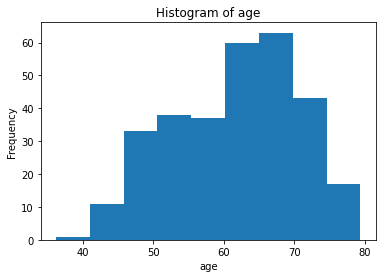

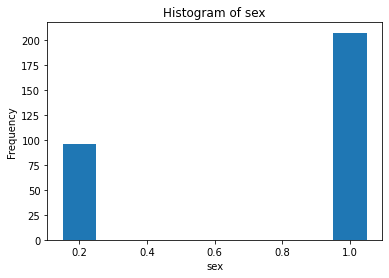

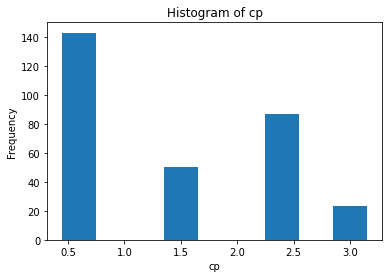

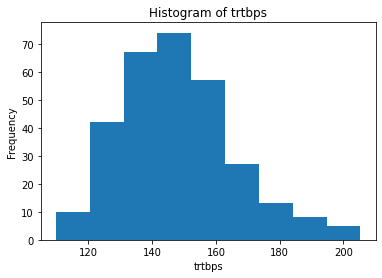

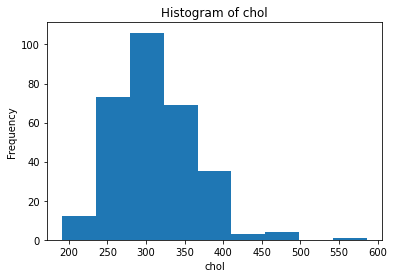

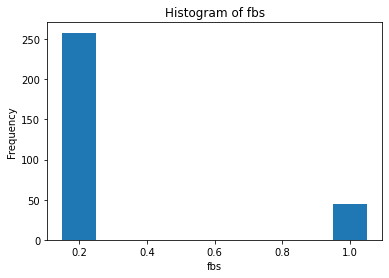

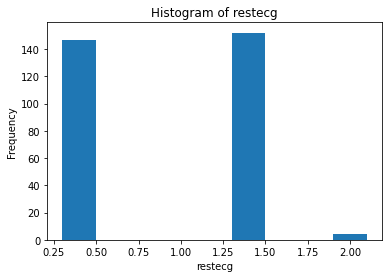

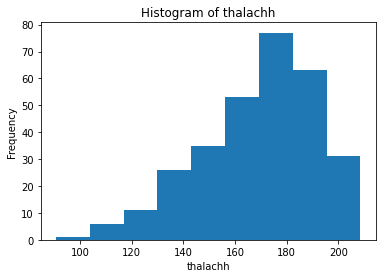

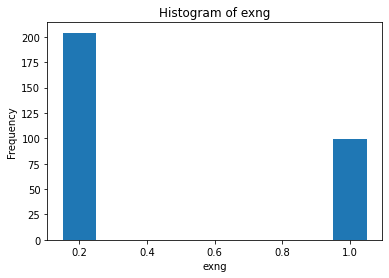

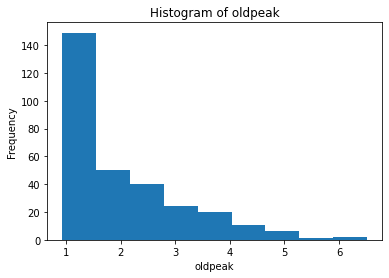

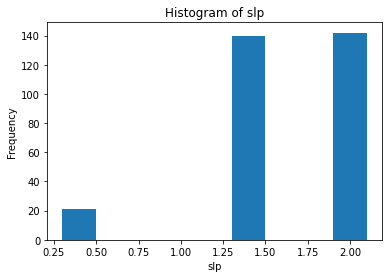

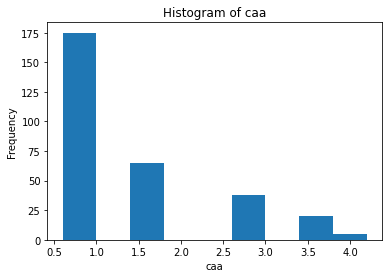

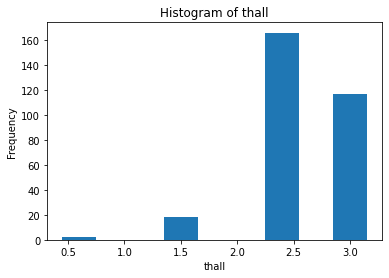

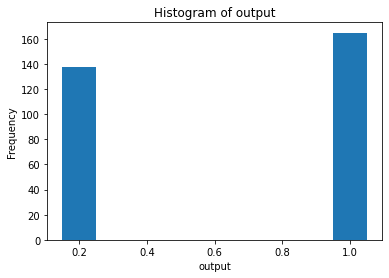

In [ ]:
for col in data.columns:
  data[col].hist()

In [ ]:
train,test= data.split_frame(ratios=[.8])

In [ ]:
print(len(train),len(test))

251 52


In [ ]:
response = "output"
train[response] = train[response].asfactor()
test[response] = test[response].asfactor()

In [ ]:
predictor= data.columns

In [ ]:
predictor.remove("output")

In [ ]:
predictor

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall']

 **H2O AutoML Execution**

In [ ]:
aml= H2OAutoML(max_runtime_secs=180,verbosity="info")
aml.train(predictor,response,train)

AutoML progress: |
03:10:18.158: Project: AutoML_1_20230301_31018
03:10:18.161: 5-fold cross-validation will be used.
03:10:18.166: Setting stopping tolerance adaptively based on the training frame: 0.05
03:10:18.167: Build control seed: -1 (random)
03:10:18.167: training frame: Frame key: AutoML_1_20230301_31018_training_py_89_sid_8872    cols: 14    rows: 251  chunks: 1    size: 4657  checksum: -7910107592927345425
03:10:18.167: validation frame: NULL
03:10:18.168: leaderboard frame: NULL
03:10:18.168: blending frame: NULL
03:10:18.168: response column: output
03:10:18.168: fold column: null
03:10:18.168: weights column: null
03:10:18.217: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (6g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (6g, 10w)]}, {DeepLearning 

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_lr_annealing_selection_AutoML_1_20230301_31018_select_model


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    53                 53                          7119                   3            5            3.54717       5             8             6.03774

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.08789074325764436
RMSE: 0.29646373008792215
LogLoss: 0.3029582739664403
Mean Per-Class Error: 0.09739390850006371
AUC: 0.9629794826048171
AUCPR: 0.9668108212621546
Gini: 0.9259589652096343

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.504341836844742
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      103  15   0.1271   (15.0/118.0)
1      9    124  0.0677   (9.0/133.0)
Total  112  139  0.0956   (24.0/251.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.504342     0.911765  137
max f2                       0.4313       0.9375    154
max f0point5                 0.667368     0.924956  108
max accuracy                 0.504342     0.904382  137
max precision                0.970592     1         0
max recall                   0.178827     1         186
max specificity              0.970592     1         0
max absolute_mcc             0.504342     0.808464  137
max min_per_class_accuracy   0.546398     0.879699  125
max mean_per_class_accuracy  0.504342     0.902606  137
max tns                      0.970592     118       0
max fns                      0.970592     132       0
max fps                      0.0131226    118       249
max tps                      0.178827     133       186
max tnr                      0.970592     1         0
max fnr                      0.970592     0.992481  0
max fpr                      0.0131226    1         249
max tpr                      0.178827     1         186

Gains/Lift Table: Avg response rate: 52.99 %, avg score: 52.21 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0119522                   0.9678             1.88722   1.88722            1                0.969897   1                           0.969897            0.0225564       0.0225564                  88.7218   88.7218            0.0225564
2        0.0239044                   0.961664           1.88722   1.88722            1                0.964045   1                           0.966971            0.0225564       0.0451128                  88.7218   88.7218            0.0451128
3        0.0318725                   0.951798           1.88722   1.88722            1                0.953286   1                           0.96355             0.0150376       0.0601504                  88.7218   88.7218            0.0601504
4        0.0438247                   0.949642           1.88722   1.88722            1                0.950241   1                           0.95992             0.0225564       0.0827068                  88.7218   88.7218            0.0827068
5        0.0517928                   0.945413           1.88722   1.88722            1                0.948761   1                 

**Interpreting the above results**

MAE: The mean absolute error (MAE) is the average absolute difference between the target values and the predicted values. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSE: The root-mean-square error metric is a frequently used measure of the differences between the values predicted by a model or an estimator and the values observed. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSLE: The root-mean-squared logarithmic error metric is similar to RMSE, except that it uses the natural logarithm of the predicted and actual values plus 1. RMSLE penalizes under-prediction more heavily than over-prediction. It can also be a good metric when you don't want to penalize differences for large prediction values more heavily than for small prediction values. This metric ranges from zero to infinity; a lower value indicates a higher quality model. The RMSLE evaluation metric is returned only if all label and predicted values are non-negative.

r^2: r squared (r^2) is the square of the Pearson correlation coefficient between the labels and predicted values. This metric ranges between zero and one; a higher value indicates a higher quality model.

MAPE: Mean absolute percentage error (MAPE) is the average absolute percentage difference between the labels and the predicted values. This metric ranges between zero and infinity; a lower value indicates a higher quality model.

K-fold cross-validation is used to validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split.

Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the h2o.automl() function for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of regression, the default ranking metric is mean residual deviance.

In [ ]:
lb=aml.leaderboard
print(aml.leaderboard)

model_id                                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
GBM_lr_annealing_selection_AutoML_1_20230301_31018_select_model          0.912259   0.386778  0.919349                0.158086  0.348685  0.121581
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_31018                   0.911495   0.37985   0.913232                0.151523  0.344374  0.118593
GBM_grid_1_AutoML_1_20230301_31018_model_15                              0.910539   0.379187  0.912403                0.156716  0.34436   0.118584
GBM_grid_1_AutoML_1_20230301_31018_model_10                              0.910348   0.385613  0.914972                0.174143  0.34709   0.120471
GBM_grid_1_AutoML_1_20230301_31018_model_8                               0.909201   0.384693  0.917941                0.158086  0.348138  0.1212
XGBoost_lr_search_selection_AutoML_1_20230301_31018_select_grid_model_1  0.909201   0.378891  0.902992                0.

**Explaining the Leaderboard:** <br/>
The reason why the H2O AutoML leaderboard shows stacked ensemble algorithms is because one of the primary goals of H2O AutoML is to automatically build a high-performing ensemble model from a diverse set of base models.<br/>

The process of building a stacked ensemble model involves training multiple base models on the input data, and then training a metalearning model on the predictions of the base models. The metalearning model learns how to combine the predictions of the base models in order to make more accurate predictions. The result is an ensemble model that is typically more accurate than any of the individual base models.<br/>

H2O AutoML uses a variety of base models during the training process, including deep learning models, tree-based models, and linear models. After training the base models, H2O AutoML selects the best performing models and uses them to build the stacked ensemble. The stacked ensemble is typically one of the top performing models on the leaderboard.<br/>



In [ ]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_lr_annealing_selection_AutoML_1_20230301_31018_select_model,0.912259,0.386778,0.919349,0.158086,0.348685,0.121581
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_31018,0.911495,0.37985,0.913232,0.151523,0.344374,0.118593
GBM_grid_1_AutoML_1_20230301_31018_model_15,0.910539,0.379187,0.912403,0.156716,0.34436,0.118584
GBM_grid_1_AutoML_1_20230301_31018_model_10,0.910348,0.385613,0.914972,0.174143,0.34709,0.120471
GBM_grid_1_AutoML_1_20230301_31018_model_8,0.909201,0.384693,0.917941,0.158086,0.348138,0.1212
XGBoost_lr_search_selection_AutoML_1_20230301_31018_select_grid_model_1,0.909201,0.378891,0.902992,0.152001,0.342875,0.117563
GBM_grid_1_AutoML_1_20230301_31018_model_4,0.90455,0.392573,0.908254,0.171276,0.351779,0.123748
GBM_grid_1_AutoML_1_20230301_31018_model_16,0.903594,0.395672,0.904216,0.148656,0.352799,0.124467
GBM_grid_1_AutoML_1_20230301_31018_model_13,0.903466,0.396887,0.898993,0.164713,0.351296,0.123409
StackedEnsemble_BestOfFamily_5_AutoML_1_20230301_31018,0.902702,0.392271,0.906736,0.160475,0.352854,0.124506


The models here are listed based on the AUC metric. Although there are multiple sort metrics to sort and score each models, we are sticking to the default one here. That is AUC for a binary classification problem and mean_per_class_error for multinomial classification. In our case it is a binary classification problem.

**Observation from the leaderboard:**


1.   GBM_grid_1_AutoML_1_20230217_05321_model_12 is the best performing model with an AUC of 0.923

2.   While the second and third are almost similarly succesful in classifying with an AUC of 0.921 <br/>

Note: Since this a binary classification problem we are checking our AUC but in any other case of a multinominal classification problem we would consider the MPCE


 **Analysing relation between all variables**<br/>

When all independent variables were plotted against 'output' variable it is observed that there is no linear relationship between any of the variables.<br/>

VIF stands for Variance Inflation Factor.It signifies multicollinearity among set of different independent variable. A value greater than 10 means that the independent variable is highly correlated with some other variable. Will calculate VIF value for all variables to check the dependency and then will drop the variables with high VIF value.<br/>

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = df[['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

,variables,VIF
0,age,38.998305
1,sex,3.523211
2,cp,2.414403
3,trtbps,58.557335
4,chol,26.267365
5,fbs,1.268205
6,restecg,2.058206
7,thalachh,42.742178
8,exng,2.022527
9,oldpeak,3.062890


VIF for age , trtbps, thalachh, chol is greater than 10, indicates that there is an existence of multicollinearity in the data <br/>

VIF for 'trtbps','age','Longtitude','chol', 'thal', and 'thalachh' is greater than 10. Not dropping any of the variables as for a person to determine the probability of heart-attack, all these variables are necessary

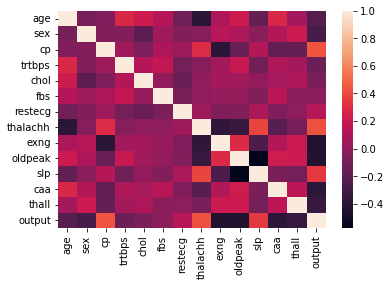

In [ ]:
cor = sns.heatmap(df.corr())

[thlachh, age], [exng, cp], [oldpeak,slp] --> these pairs have multicollinearity

In [ ]:
mdl_idx=0
gbm_idx=0
#glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = gbm_idx
    if "GBM" not in m:
        break
    gbm_idx = gbm_idx + 1

for m in aml_leaderboard_df["model_id"]:
    if "StackedEnsemble" in m:
        models_dict[m] = mdl_idx
        break
    mdl_idx = mdl_idx + 1
models_dict

{'GBM_lr_annealing_selection_AutoML_1_20230301_31018_select_model': 0,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_31018': 1}

In [ ]:
print(mdl_idx)
best_model= h2o.get_model(aml.leaderboard[mdl_idx,"model_id"])

1


In [ ]:
best_model.algo

'stackedensemble'

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

In [ ]:
#if best_model.algo in ["gbm","drf","xrt","xgboost","stackedensemble"]:
  #best_model.varimp_plot()

*The above cell gives an error since the variable importance plot is not available for Stacked Ensembles. We should examine our next best models that are not StackedEnsembles*


In [ ]:
aml.leaderboard[:5,"model_id"]

model_id
GBM_lr_annealing_selection_AutoML_1_20230301_31018_select_model
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_31018
GBM_grid_1_AutoML_1_20230301_31018_model_15
GBM_grid_1_AutoML_1_20230301_31018_model_10
GBM_grid_1_AutoML_1_20230301_31018_model_8


In [ ]:
m = h2o.get_model(lb[0,"model_id"])

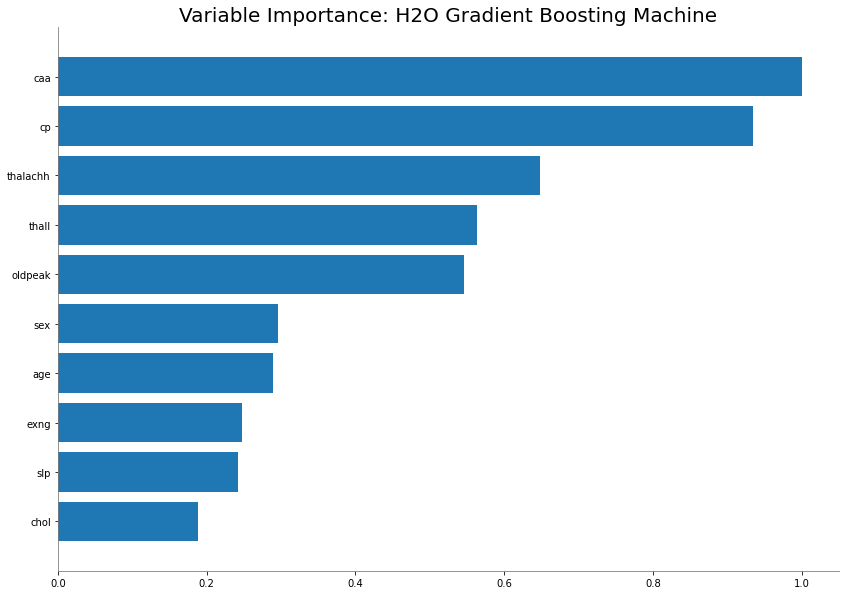

<Figure size 432x288 with 0 Axes>

In [ ]:
m.varimp_plot()

The above Variable Importance Graph  is based on H2o's Gradient Boosting Machine. 
Key Takeaways:


1.   "cp" Chest pain type is the most important variable of all.
2.   "caa" is very close to "cp" with an importance of 0.85


In [ ]:
if gbm_idx is not 0:
    print(mdl_idx)
    sem_model = h2o.get_model(aml.leaderboard[mdl_idx, "model_id"])
    print(sem_model.algo)
    #sem_model.std_coef_plot()

1
stackedensemble


<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-36-b7a451c6bc7f>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gbm_idx is not 0:


In [ ]:
print(best_model.auc(train=True))

0.9779533579711992


In [ ]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [ ]:
mod_perf = best_model.model_performance(test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.10273088790452053,
 'rmse': 0.3205165953652331,
 'null_degrees_of_freedom': 51,
 'residual_degrees_of_freedom': 46,
 'residual_deviance': 35.09627703970887,
 'null_deviance': 70.83737648488668,
 'aic': 47.09627703970887,
 'logloss': 0.337464202304893,
 'auc': 0.95625,
 'gini': 0.9125000000000001}

In [ ]:
predictions = best_model.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

    predict        p0        p1
0         1  0.159973  0.840027
1         1  0.284494  0.715506
2         1  0.248879  0.751121
3         1  0.250999  0.749001
4         1  0.186111  0.813889
5         1  0.066483  0.933517
6         1  0.465253  0.534747
7         0  0.528930  0.471070
8         1  0.221545  0.778455
9         1  0.132801  0.867199
10        0  0.913796  0.086204
11        1  0.015369  0.984631
12        1  0.154014  0.845986
13        1  0.019628  0.980372
14        1  0.111857  0.888143
15        1  0.307688  0.692312
16        1  0.054615  0.945385
17        1  0.147916  0.852084
18        1  0.239325  0.760675
19        0  0.841502  0.158498
20        0  0.855589  0.144411
21        1  0.349682  0.650318
22        1  0.137170  0.862830
23        1  0.020538  0.979462
24        1  0.006000  0.994000
25        1  0.069587  0.930413
26        1  0.254539  0.745461
27        1  0.379275  0.620725
28        0  0.780188  0.219812
29        1  0.243052  0.756948
30      

In [ ]:
y_test= h2o.as_list(test[response])
y_test

,output
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [ ]:
print(predictor)

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']


# **Regularization in H20**

The main purpose of regression is to find patterns in this underlying dataset and generalize it to predict the corresponding target value for some new values of independent values. But sometimes target dataset is inflicted with some random noise. Although there may not be error for training set it will give huge errors in predicting the correct target values for test dataset.To avoid this condition regularization is used. Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. For this model, Ridge Regularization is used.

Here, we use H2OGeneralizedLinearEstimator which would enable us to fit a generalized linear model, specified by a response variable, a set of predictors and a description of the error distribution.

In [ ]:
##Regularisation

from h2o.estimators.gbm import H2OGradientBoostingEstimator
# Elastic Net Regularization
#heart_gbm = H2OGradientBoostingEstimator(family="auto", lambda_=0, compute_p_values=True, nfolds=5) 
# RIDGE Regularization
#heart_gbm_regularization_ridge = H2OGradientBoostingEstimator(family="auto", alpha=0, nfolds=5)
 # LASSO Regularization

In the above cell, execute by uncommenting the 2 lines <br/>
 heart_gbm = H2OGradientBoostingEstimator(family="auto", lambda_=0, compute_p_values=True, nfolds=5) <br/> heart_gbm_regularization_ridge = H2OGradientBoostingEstimator(family="auto", alpha=0, nfolds=5) <br/>
 Which gives an error that seems pretty straightforward. Regularization is the process of adding penalty to the loss function to avoid and counter overfittting. We try to apply different types of regularisation to see the effects. Unlike coefficients, we have to solve for the leaf values. So alpha is not a parameter of GradientBoostingEstimator nor is family So we use GLM model to check if regularization is useful to make the model perform better.

In [ ]:
from h2o.estimators import H2OGeneralizedLinearEstimator
heart_glm = H2OGeneralizedLinearEstimator(family="auto",lambda_=0, compute_p_values=True, nfolds=10)
# RIDGE Regularization
heart_glm_regularization_ridge = H2OGeneralizedLinearEstimator(family="auto", alpha=0, nfolds=10)
 # LASSO Regularization
heart_gm_regularization_lasso = H2OGeneralizedLinearEstimator(family="auto", alpha=1, nfolds=10) 
# Lambda Search
heart_glm_regularization_lambda_search = H2OGeneralizedLinearEstimator(lambda_search=True)

We are creating two different GLM models using different regularization tokens: Ridge and Lasso

heart_glm_regularization_ridge is a ridge regression instance as obvious from the name. we set the number of cross-validation folds to 10 and alpha=0 representing the L1 penalty
heart_glm_regularization_lasso is a lasso regression instance. we set the same number of cv folds i.e. 10 folds and alpha set to 1 representing L2 penalty.

In [ ]:
heart_glm.train(predictor,response,train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677640089433_8248


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   None              13                            13                             6                       py_89_sid_8872

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10621171022839519
RMSE: 0.32590138113913414
LogLoss: 0.34403738746855284
AUC: 0.9255129348795719
AUCPR: 0.9289021628477299
Gini: 0.8510258697591437
Null degrees of freedom: 250
Residual degrees of freedom: 237
Null deviance: 347.0629359632711
Residual deviance: 172.70676850921353
AIC: 200.70676850921353

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42568247884890414
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      90   28   0.2373   (28.0/118.0)
1      7    126  0.0526   (7.0/133.0)
Total  97   154  0.1394   (35.0/251.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.425682     0.878049  152
max f2                       0.319017     0.920863  161
max f0point5                 0.718294     0.880342  112
max accuracy                 0.497265     0.860558  143
max precision                0.99853      1         0
max recall                   0.0282801    1         210
max specificity              0.99853      1         0
max absolute_mcc             0.425682     0.727827  152
max min_per_class_accuracy   0.602946     0.849624  129
max mean_per_class_accuracy  0.497265     0.85743   143
max tns                      0.99853      118       0
max fns                      0.99853      132       0
max fps                      0.000452446  118       249
max tps                      0.0282801    133       210
max tnr                      0.99853      1         0
max fnr                      0.99853      0.992481  0
max fpr                      0.000452446  1         249
max tpr                      0.0282801    1         210

Gains/Lift Table: Avg response rate: 52.99 %, avg score: 77.68 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0119522                   1.3641             0         0                  0                1.49442   0                           1.49442             0               0                          -100      -100               -0.0254237
2        0.0239044                   1.22463            0         0                  0                1.25988   0                           1.37715             0               0                          -100      -100               -0.0508475
3        0.0318725                   1.19672            0         0                  0                1.20734   0                           1.3347              0               0                          -100      -100               -0.0677966
4        0.0438247                   1.1491             0.629073  0.171565           0.333333         1.1697    0.0909091                   1.2897              0.0075188       0.0075188                  -37.0927  -82.8435           -0.077227
5        0.0517928                   1.13454            0         0.14517

### **Ridge Regression**

In [ ]:
heart_glm_regularization_ridge.train(predictor,response,train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677640089433_8281


GLM Model: summary
    family    link    regularization               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Ridge ( lambda = 2.206E-4 )  13                            13                             5                       py_89_sid_8872

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10623017792812803
RMSE: 0.32592971317161007
LogLoss: 0.3440393845401248
AUC: 0.9256403721167326
AUCPR: 0.9290487395708864
Gini: 0.8512807442334651
Null degrees of freedom: 250
Residual degrees of freedom: 237
Null deviance: 347.0629359632711
Residual deviance: 172.70777103914264
AIC: 200.70777103914264

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4264062285862494
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      90   28   0.2373   (28.0/118.0)
1      7    126  0.0526   (7.0/133.0)
Total  97   154  0.1394   (35.0/251.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.426406     0.878049  152
max f2                       0.319847     0.920863  161
max f0point5                 0.717949     0.880342  112
max accuracy                 0.498206     0.860558  143
max precision                0.998491     1         0
max recall                   0.028648     1         210
max specificity              0.998491     1         0
max absolute_mcc             0.426406     0.727827  152
max min_per_class_accuracy   0.60268      0.849624  129
max mean_per_class_accuracy  0.498206     0.85743   143
max tns                      0.998491     118       0
max fns                      0.998491     132       0
max fps                      0.00046738   118       249
max tps                      0.028648     133       210
max tnr                      0.998491     1         0
max fnr                      0.998491     0.992481  0
max fpr                      0.00046738   1         249
max tpr                      0.028648     1         210

Gains/Lift Table: Avg response rate: 52.99 %, avg score: 52.99 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0119522                   0.994525           1.88722   1.88722            1                0.996365    1                           0.996365            0.0225564       0.0225564                  88.7218   88.7218            0.0225564
2        0.0239044                   0.99364            1.88722   1.88722            1                0.994018    1                           0.995191            0.0225564       0.0451128                  88.7218   88.7218            0.0451128
3        0.0318725                   0.992277           1.88722   1.88722            1                0.99241     1                           0.994496            0.0150376       0.0601504                  88.7218   88.7218            0.0601504
4        0.0438247                   0.991074           1.88722   1.88722            1                0.991748    1                           0.993747            0.0225564       0.0827068                  88.7218   88.7218            0.0827068
5        0.0517928               

## **Lasso Regression**

In [ ]:
heart_gm_regularization_lasso.train(predictor,response,train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677640089433_8314


GLM Model: summary
    family    link    regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Lasso (lambda = 2.206E-4 )  13                            13                             5                       py_89_sid_8872

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10624055408496247
RMSE: 0.3259456305658391
LogLoss: 0.34404222696459624
AUC: 0.9255766534981521
AUCPR: 0.9289031684005462
Gini: 0.8511533069963042
Null degrees of freedom: 250
Residual degrees of freedom: 237
Null deviance: 347.0629359632711
Residual deviance: 172.7091979362273
AIC: 200.7091979362273

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42556193944909665
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      90   28   0.2373   (28.0/118.0)
1      7    126  0.0526   (7.0/133.0)
Total  97   154  0.1394   (35.0/251.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.425562     0.878049  152
max f2                       0.320401     0.920863  161
max f0point5                 0.717702     0.880342  112
max accuracy                 0.522247     0.860558  139
max precision                0.998467     1         0
max recall                   0.0288473    1         210
max specificity              0.998467     1         0
max absolute_mcc             0.425562     0.727827  152
max min_per_class_accuracy   0.604469     0.849624  129
max mean_per_class_accuracy  0.522247     0.858385  139
max tns                      0.998467     118       0
max fns                      0.998467     132       0
max fps                      0.000473146  118       249
max tps                      0.0288473    133       210
max tnr                      0.998467     1         0
max fnr                      0.998467     0.992481  0
max fpr                      0.000473146  1         249
max tpr                      0.0288473    1         210

Gains/Lift Table: Avg response rate: 52.99 %, avg score: 52.99 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0119522                   0.994476           1.88722   1.88722            1                0.996321    1                           0.996321            0.0225564       0.0225564                  88.7218   88.7218            0.0225564
2        0.0239044                   0.993555           1.88722   1.88722            1                0.993969    1                           0.995145            0.0225564       0.0451128                  88.7218   88.7218            0.0451128
3        0.0318725                   0.992195           1.88722   1.88722            1                0.992361    1                           0.994449            0.0150376       0.0601504                  88.7218   88.7218            0.0601504
4        0.0438247                   0.991038           1.88722   1.88722            1                0.991672    1                           0.993692            0.0225564       0.0827068                  88.7218   88.7218            0.0827068
5        0.0517928                   

In [ ]:
heart_glm_regularization_lambda_search.train(predictor,response,train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677640089433_8347


GLM Model: summary
    family    link    regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 0.001145 )  nlambda = 100, lambda.max = 0.4412, lambda.min = 0.001145, lambda.1se = -1.0  13                            13                             104                     py_89_sid_8872

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10634006268264339
RMSE: 0.3260982408456743
LogLoss: 0.34411438940874256
AUC: 0.9256403721167326
AUCPR: 0.9289167007384861
Gini: 0.8512807442334651
Null degrees of freedom: 250
Residual degrees of freedom: 237
Null deviance: 347.0629359632711
Residual deviance: 172.74542348318877
AIC: 200.74542348318877

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42722127106788843
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      90   28   0.2373   (28.0/118.0)
1      7    126  0.0526   (7.0/133.0)
Total  97   154  0.1394   (35.0/251.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.427221     0.878049  152
max f2                       0.324594     0.920863  161
max f0point5                 0.716073     0.880342  112
max accuracy                 0.527001     0.860558  139
max precision                0.99826      1         0
max recall                   0.0306653    1         210
max specificity              0.99826      1         0
max absolute_mcc             0.427221     0.727827  152
max min_per_class_accuracy   0.606325     0.849624  129
max mean_per_class_accuracy  0.527001     0.858385  139
max tns                      0.99826      118       0
max fns                      0.99826      132       0
max fps                      0.000547162  118       249
max tps                      0.0306653    133       210
max tnr                      0.99826      1         0
max fnr                      0.99826      0.992481  0
max fpr                      0.000547162  1         249
max tpr                      0.0306653    1         210

Gains/Lift Table: Avg response rate: 52.99 %, avg score: 52.99 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0119522                   0.993951           1.88722   1.88722            1                0.99592     1                           0.99592             0.0225564       0.0225564                  88.7218   88.7218            0.0225564
2        0.0239044                   0.992885           1.88722   1.88722            1                0.993409    1                           0.994665            0.0225564       0.0451128                  88.7218   88.7218            0.0451128
3        0.0318725                   0.991476           1.88722   1.88722            1                0.991682    1                           0.993919            0.0150376       0.0601504                  88.7218   88.7218          


**Takeaways:**

Looking into the Cross Validation summary for all three models, Lasso is giving better AUC, accuracy and least err when compared to the non regularized and ridge regularized models.<br/>
Ridge and Nonregularized GLM model have a reduced AUC and also higher MSE, RMSE when compared to Lasso.<br/>
Lasso Regularization did a better job on the cross validation data and significantly avoided overfitting of the model

In [ ]:
coeff_tab= heart_glm._model_json["output"]["coefficients_table"]

In [ ]:
coeff_tab.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,4.630397,2.935548,1.577354,0.114714,-0.040366
1,age,-0.006295,0.025907,-0.242980,0.808021,-0.056714
2,sex,-2.007522,0.533403,-3.763616,0.000167,-0.937339
3,cp,0.919264,0.212570,4.324522,0.000015,0.945237
4,trtbps,-0.025721,0.011788,-2.181911,0.029116,-0.454706
5,chol,-0.005898,0.004593,-1.284229,0.199062,-0.295870
6,fbs,0.194727,0.599548,0.324790,0.745340,0.068390
7,restecg,0.483975,0.388746,1.244965,0.213145,0.257056
8,thalachh,0.024826,0.012246,2.027234,0.042639,0.565819
9,exng,-0.596973,0.460210,-1.297175,0.194571,-0.282258


# **Data Report**

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_1_20230301_31018_model_1,0.971875,0.324317,0.983152,0.08125,0.308699,0.0952949,137,0.100047,XGBoost
GBM_grid_1_AutoML_1_20230301_31018_model_15,0.970313,0.315254,0.983955,0.046875,0.302385,0.0914369,82,0.112942,GBM
XGBoost_grid_1_AutoML_1_20230301_31018_model_31,0.965625,0.350114,0.97867,0.125,0.322865,0.104242,133,0.099315,XGBoost
GBM_grid_1_AutoML_1_20230301_31018_model_11,0.965625,0.305118,0.979655,0.08125,0.299204,0.0895232,101,0.111211,GBM
XGBoost_grid_1_AutoML_1_20230301_31018_model_8,0.964844,0.328553,0.980646,0.0625,0.314473,0.0988936,158,0.121331,XGBoost
GBM_grid_1_AutoML_1_20230301_31018_model_4,0.964063,0.319419,0.98088,0.071875,0.301739,0.0910463,132,0.114146,GBM
GBM_grid_1_AutoML_1_20230301_31018_model_6,0.964063,0.325886,0.97991,0.071875,0.309751,0.0959457,101,0.105304,GBM
XGBoost_grid_1_AutoML_1_20230301_31018_model_21,0.964063,0.340772,0.979556,0.078125,0.322029,0.103703,113,0.105866,XGBoost
XGBoost_grid_1_AutoML_1_20230301_31018_model_13,0.9625,0.386488,0.979029,0.078125,0.33862,0.114664,291,0.109401,XGBoost
XGBoost_grid_1_AutoML_1_20230301_31018_model_17,0.959375,0.356977,0.976424,0.140625,0.325651,0.106049,136,0.496876,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_lr_annealing_selection_AutoML_1_20230301_31018_select_model

,0,1,Error,Rate
0,19.0,1.0,0.05,(1.0/20.0)
1,4.0,28.0,0.125,(4.0/32.0)
Total,23.0,29.0,0.0962,(5.0/52.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

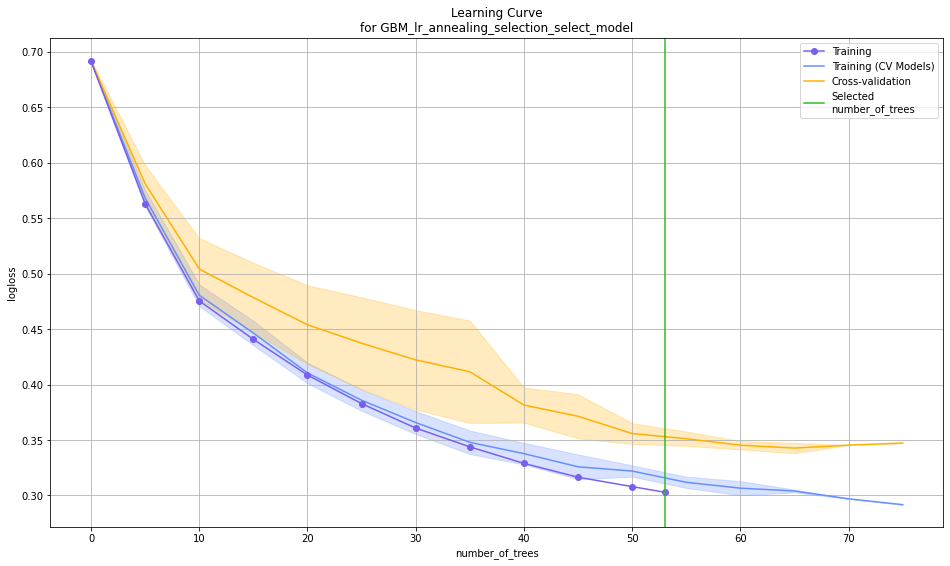

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

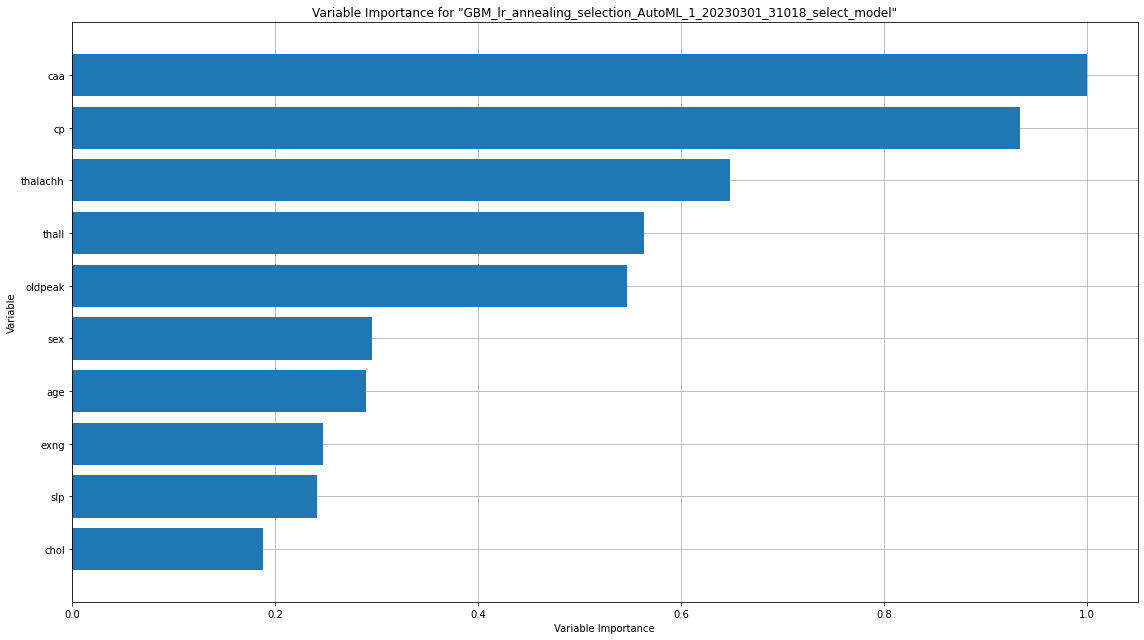

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

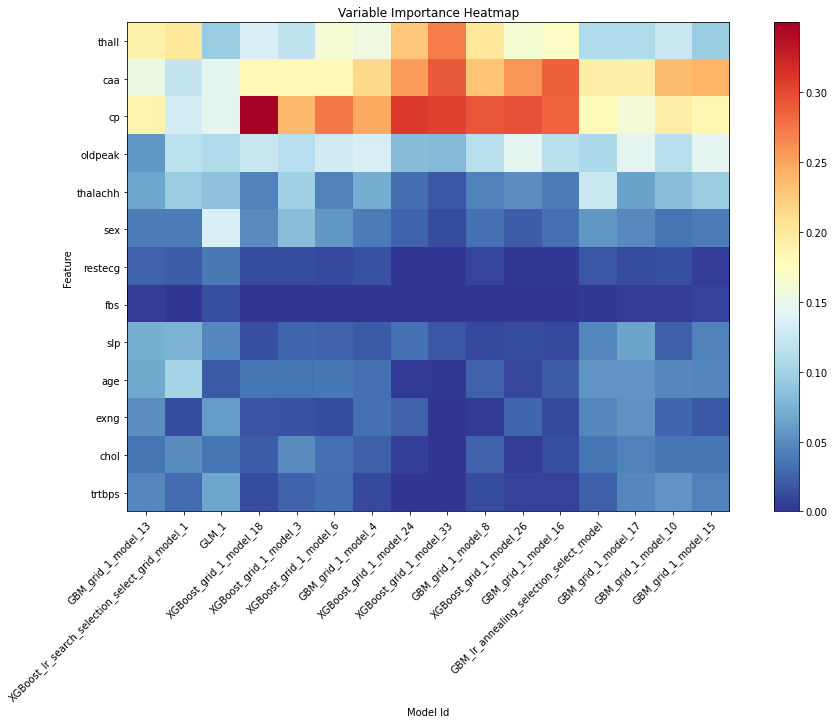

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

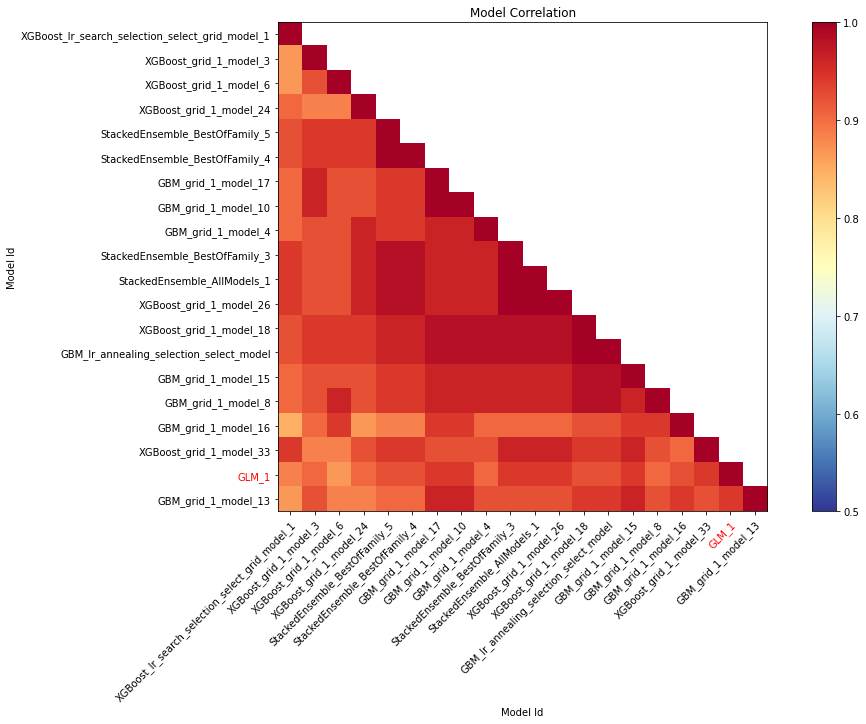

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

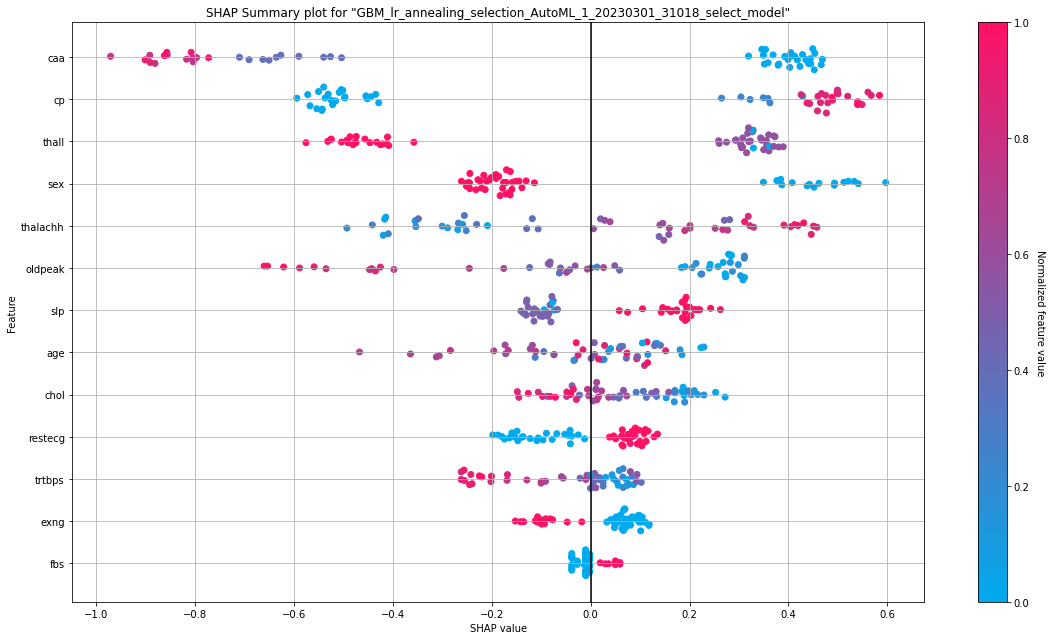

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

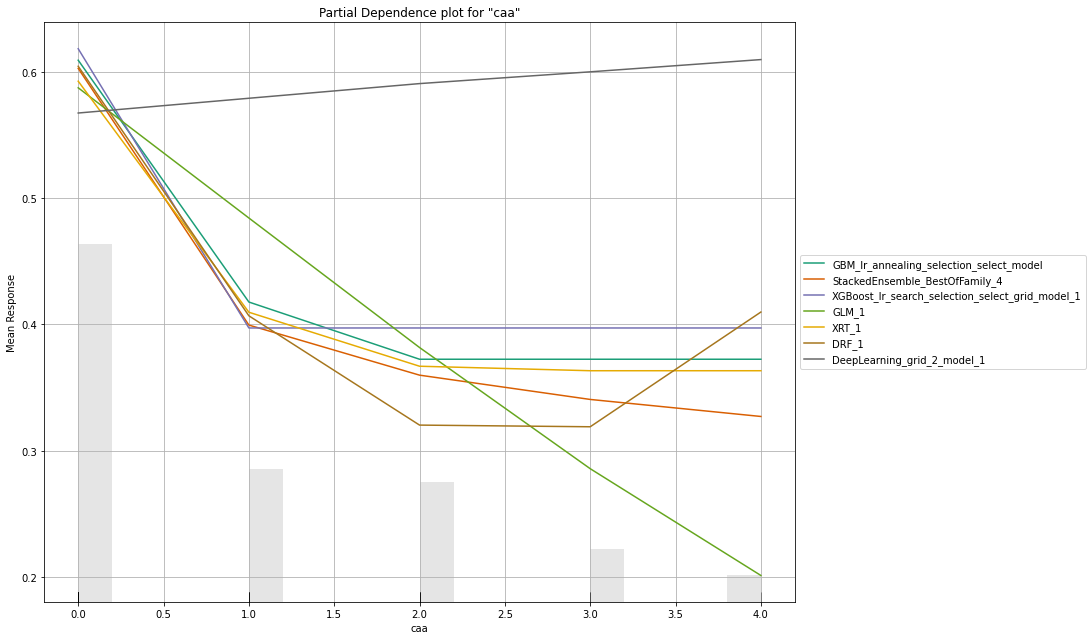

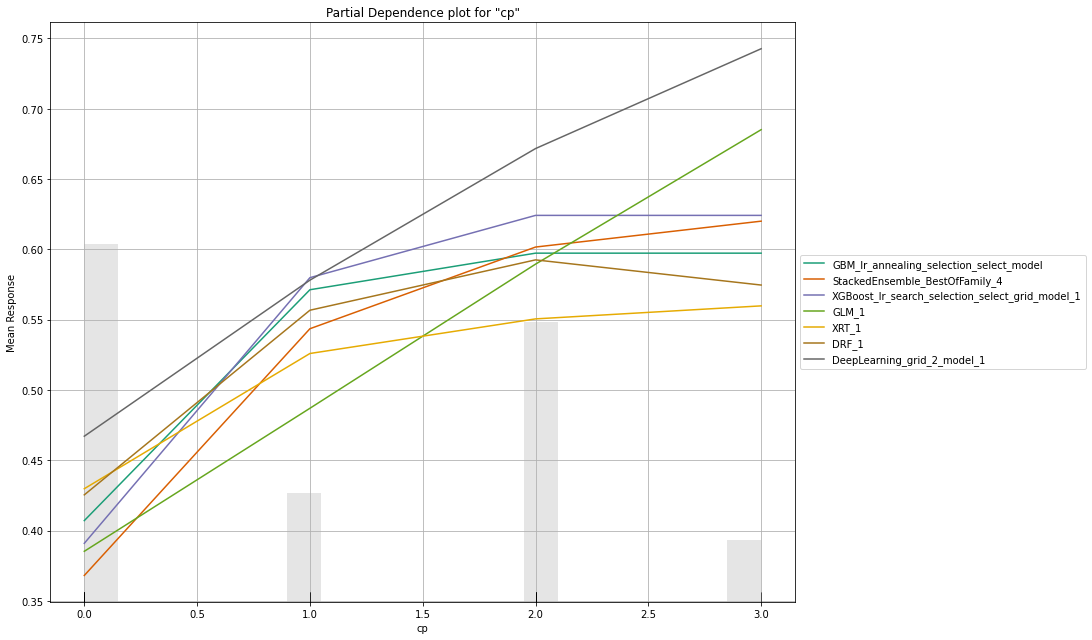

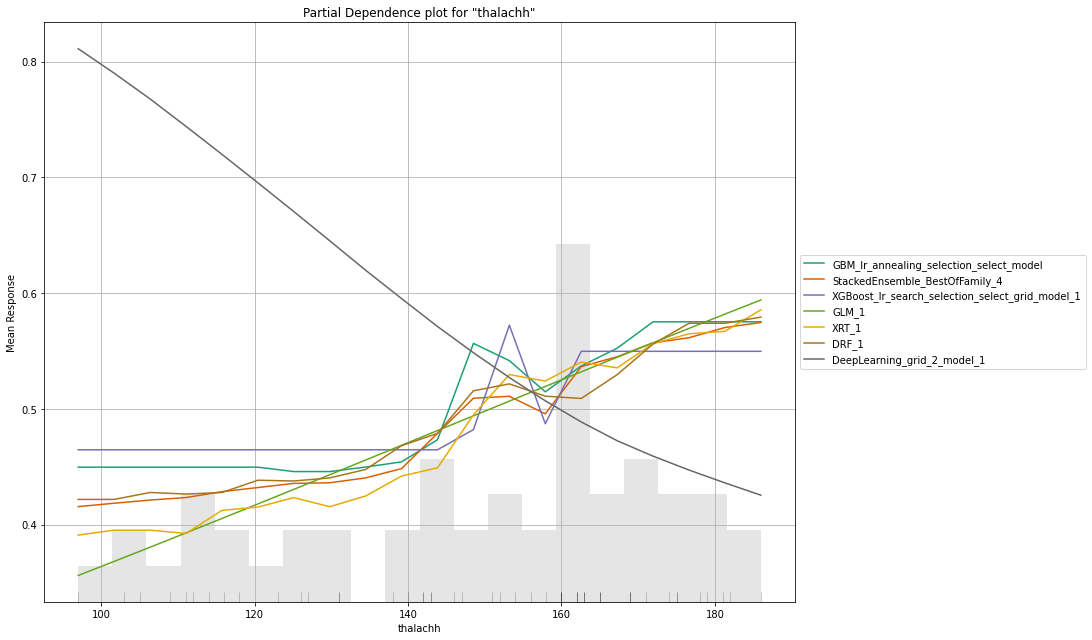

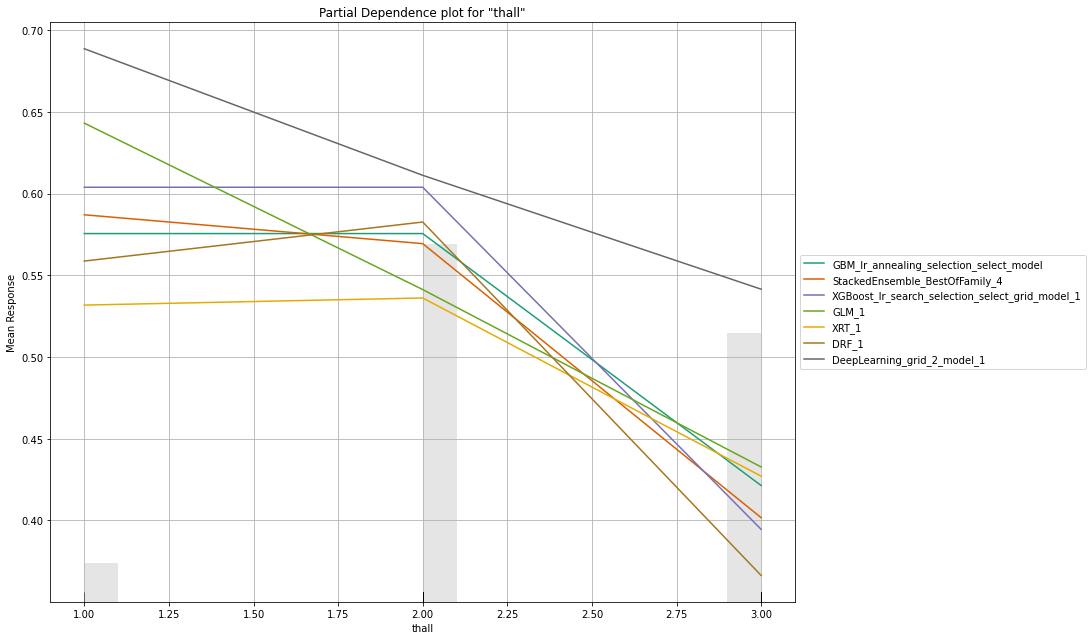

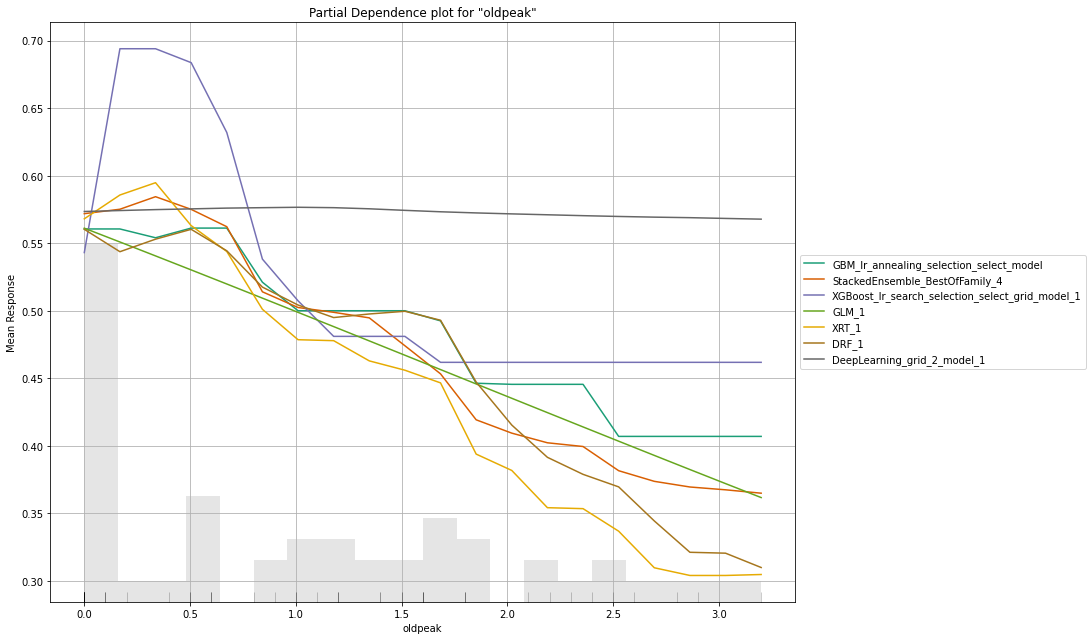

In [ ]:
exa= aml.explain(test)

In [ ]:
import statsmodels.formula.api as smf
import h2o
pandas_df = h2o.as_list(data)

In [ ]:
results = smf.ols("output ~ age + sex + cp + trtbps + chol + fbs + restecg +thalachh + exng + oldpeak + slp + caa + thall",
data=pandas_df,
).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     23.85
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           1.49e-38
Time:                        03:23:14   Log-Likelihood:                -108.28
No. Observations:                 303   AIC:                             244.6
Df Residuals:                     289   BIC:                             296.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8289      0.293      2.830      0.005       0.252       1.405
age           -0.0008      0.003     -0.304      0.761      -0.006       0.004
sex           -0.1960      0.047     -4.157      0.000      -0.289      -0.103
cp             0.1127      0.022      5.036      0.000       0.069       0.157
trtbps        -0.0020      0.001     -1.583      0.114      -0.004       0.000
chol          -0.0004      0.000     -0.838      0.403      -0.001       0.000
fbs            0.0174      0.060      0.291      0.771      -0.100       0.135
restecg        0.0498      0.040      1.249      0.213      -0.029       0.128
thalachh       0.0030      0.001      2.671      0.008       0.001       0.005
exng          -0.1440      0.051     -2.804      0.005      -0.245      -0.043
oldpeak       -0.0588      0.023     -2.564      0.011      -0.104      -0.014
slp            0.0790      0.042      1.863      0.063      -0.004       0.162
caa           -0.1006      0.022     -4.603      0.000      -0.144      -0.058
thall         -0.1190      0.036     -3.339      0.001      -0.189      -0.049
==============================================================================
Omnibus:                        6.751   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.958
Skew:                          -0.361   Prob(JB):                       0.0308
Kurtosis:                       2.824   Cond. No.                     4.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Hyperparameter Tuning**


To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

In [ ]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=316), [int(0.6 * len(data)), int(0.8 * len(data))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [ ]:
from h2o.grid.grid_search import H2OGridSearch

In [ ]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [ ]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [ ]:
gbm_grid2.train(
    x=predictor, y=response, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.2,0.02,10.0,0.5,gbm_grid2_model_25,0.1480062
,0.1,0.02,9.0,0.8,gbm_grid2_model_16,0.1491071
,0.3000000,0.02,2.0,1.0,gbm_grid2_model_20,0.1516401
,0.5,0.02,2.0,0.9,gbm_grid2_model_35,0.1530735
,0.5,0.03,2.0,0.6000000,gbm_grid2_model_26,0.1540304
,0.1,0.08,3.0,0.8,gbm_grid2_model_13,0.1553162
,0.2,0.04,5.0,0.9,gbm_grid2_model_29,0.1556439
,0.5,0.05,2.0,0.8,gbm_grid2_model_27,0.1567162
,0.9,0.03,10.0,0.5,gbm_grid2_model_21,0.1567299
,0.8,0.04,2.0,0.9,gbm_grid2_model_4,0.1569349


In [ ]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

In [ ]:
gbm_gridperf2

,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.2,0.02,10.0,0.5,gbm_grid2_model_25,0.1480062
,0.1,0.02,9.0,0.8,gbm_grid2_model_16,0.1491071
,0.3000000,0.02,2.0,1.0,gbm_grid2_model_20,0.1516401
,0.5,0.02,2.0,0.9,gbm_grid2_model_35,0.1530735
,0.5,0.03,2.0,0.6000000,gbm_grid2_model_26,0.1540304
,0.1,0.08,3.0,0.8,gbm_grid2_model_13,0.1553162
,0.2,0.04,5.0,0.9,gbm_grid2_model_29,0.1556439
,0.5,0.05,2.0,0.8,gbm_grid2_model_27,0.1567162
,0.9,0.03,10.0,0.5,gbm_grid2_model_21,0.1567299
,0.8,0.04,2.0,0.9,gbm_grid2_model_4,0.1569349


In [ ]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [ ]:
models = gbm_gridperf2.models

In [ ]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [ ]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [ ]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [ ]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.2        0.02         10          0.5           0.148006
1               0.1        0.02          9          0.8           0.149107
2               0.3        0.02          2          1.0           0.151640
3               0.5        0.02          2          0.9           0.153073
4               0.5        0.03          2          0.6           0.154030
5               0.1        0.08          3          0.8           0.155316
6               0.2        0.04          5          0.9           0.155644
7               0.5        0.05          2          0.8           0.156716
8               0.9        0.03         10          0.5           0.156730
9               0.8        0.04          2          0.9           0.156935
10              0.1        0.07          7          0.8           0.157331
11              0.8        0.03          5          0.5           0.158664
12              0.3      

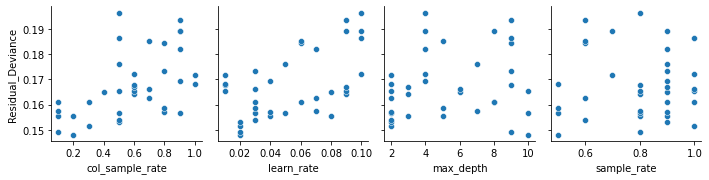

In [ ]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100, 200, 300, 400],'learning_rate': [0.001, 0.01, 0.1, 1, 10]}
random_rf = RandomizedSearchCV(estimator=model, param_distributions=param_vals,
                              n_iter=10, scoring='accuracy', cv=5,
                              refit=True, n_jobs=-1)

In [ ]:
y = df['output']
X = df.drop(['output'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

mode = RandomForestClassifier()
param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]}

In [ ]:
random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,
                              n_iter=5, scoring='accuracy', cv=5,
                              refit=True, n_jobs=-1)

#Training and prediction

random_rf.fit(X_train, y_train)
random_rf.best_estimator_.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
random_rf.best_params_

{'n_estimators': 100, 'min_samples_split': 3, 'max_depth': 800}

**Conclusion**<br/>

A fundamental algorithm based on the logistic regression method to predict heart attack prediction was constructed. VIF, p-values and other tests were considered to ignore some of the independent variables. H20.ai framework was used to train and test the variables of the dataset of Heart attack analysis and Prediction. From the results shown it can be concluded that the proposed linear regression model can effectively analyze and predict the heart attack to some extent. Admittedly, the prediction accuracy is still limited at specific points, and the model still needs to be improved in further research. In further research into the corresponding models, different techniques like removing outliers and using ensemble or booster can help achieve better prediction.


**Assignment Question/Answers**

1. **Is the relationship significant?**

      The above Variable Importance Graph is based on H2o's Gradient Boosting Machine. Key Takeaways:<br/>
      "cp" Chest pain type is the most important variable of all.<br/>
      "caa" is very close to "cp" with an importance of 0.85

2.  **Are any model assumptions violated?**<br/>
      Since our output is a binary variable, this is treated as a classification problem and not a regression problem. So applying a linear regression algorithm wouldn't necessarily give us the best results. But even in case if we applied a linear model, most of the assumptions would not stand true. <br/>
    (1)There needs to be linear relation between the independent and dependent variable. 
    This assumption is violated since fitting the regression line wouldn't justify the output i.e step function

  (2)Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed.<br/>
     This assumption is violated since the plot between the residuals i.e target and independent variable do not follow normal distribution

  (3)Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other.<br/>
    This assumption is violated since there is multicollinearity between the variables 
  (4)There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.<br/>
   As we have seen that the Durbin-Watson test value is 1.03 which says that there is autocorrelation between variables



3.  **Is there any multicollinearity in the model?**<br/>
    When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable. Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables. In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists. In this model some variables had VIF value greater than 10 and p value was greater than 0.05. By dropping those columns and rechecking the values expected output was achieved.
    From the VIF calculation, we can conclude that there is multicollinearity between the variables <br/>
    [thlachh, age], [exng, cp], [oldpeak,slp] --> these pairs have multicollinearity 

4.   **In the multivariate models are predictor variables independent of all the other predictor variables?**<br/>
    Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix or heatmap can be used, or it can be observed from graphs too whether there is any pattern followed or not. <br/>
    Heatmap indicates that, the following sets of variables [thlachh, age], [exng, cp], [oldpeak,slp] are correlated.

5.   **In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model. (exclude insignificant ones and built the model)**<br/>
    From the variable importance plot, the most to least important variables are displayed.<br/> 
    Most significant variables : thalachh, cp
    Insignificnat variables : age, sex

6.   **Does the model make sense?**<br/>
    For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable.<br/>
    Overall the model does makes sense. Because the AUC is pretty good(i.e 0.923). We can probably improve the AUC to a little extent by dropping the least important variables.

7.   **Does regularization help?**<br/>
    Regularization is a process of adding penalty to our objective function. This is generally done to avoid overfitting in a model. After we regularise our model, the algorithm significantly avoids capturing additional noise. <br/>
    For our data, we compared all 3 different iterations : Lasso Regression, Ridge Regression, Non-regularised 
    Lasso regression improved the AUC when compared to others
8.   **Which independent variables are significant?**<br/>
    Variables are significant when p-value is less than 0.05. For this model, thall, caa, cp are the most significant and sex, thalachh are the least significant

9.   **Which hyperparameters are important?**<br/>
    To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are:- 'n_estimators': 200, 'min_samples_split': 3, 'max_depth': 800




**LICENSE** <br/>
MIT License <br/><br/>

Copyright (c) 2022 Devika Boddu<br/>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.




**REFERENCES** <br/><br/>
H20.ai- https://docs.h2o.ai/ <br/>
OLS Model- http://net-informations.com/ds/mla/ols.html <br/>
Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/<br/>
Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/<br/>
Dataset-  https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset <br/>
Greeshma's AutoML Notebook - https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb <br/>
Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML <br/>